# **Lin (Lily) Han's Retail Store Performance Analytics Project**




**Project Goal:**

Reveal deeper relationships between 45 store Sales performance and Holiday Mark Down frequency

**Project Background:**

•	The dataset I chose is “Retail Data Analytics-Historical sales data from 45 stores” downloaded from Kaggle website (https://www.kaggle.com/manjeetsingh/retaildataset?select=stores+data-set.csv).
  
•	The dataset contains 3 Tables – Stores, Features and Sales. 

  I.	“Stores” table contains the 45 stores’ type and sizes. 
  
  II.	“Features” table contains additional data related to the store, department, and regional activity for the given dates, having 12 variables and 8,190 observations.

  III.	“Sales” dataset contains historical sales data, which covers to 2010-02-05 to 2012-11-01, having 5 columns and 421,570 records. 

**Data Manipulation:**

1.　Join 3 tables using SQLite 3, including 16 variables and 421,570 records. 

2.　Remove irrelevant variables that not significant for holiday week or not: 
	'temperature’,  'fuel_price’,  'cpi’,  'unemployment’, 'size’, ‘department’, ‘type’, ect. 

3.　Group 45 stores’ sales,  number of holiday weeks and other variables. 

4.　Add 2 new variables as store performance measurement: 
	1) ‘total_markdown’ = sum of 5 mark down
	2) 'markdown_to_sales_%’ = total markdown / total weekly sales 

**Pearson Correlation Test & Business Insights:**

•	The 2 continuous variables ‘Holiday Week Numbers’ and ‘Mark Down to Sales Ratio’ are positively correlated (0.75). The test is significant based on p-value (2.33e-9). 

•	The correlation reveals the higher holiday week number, the higher Mark Down to Sales Ratio that means the profit ratio is lower. 

•	The retail company should pay more attention to the frequency of holiday mark down.


**Further Consideration:**

•	Find more correlations of store performance and other input variables

•	45 Stores' historical performance comparison and research deeper reasons

•	Sales prediction using advanced and reliable Machine Learning models

## 1. Import Packages

In [2]:
# Import packages
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Set the style of plot
plt.style.use('ggplot')

## 2. Use Sqlite3 Write Analytical Queries to Import and Join Tables


In [4]:
my_conn=sqlite3.connect('Risk.db')

In [5]:
c=my_conn.cursor()

In [6]:
# Import first csv file 'Sales': 
read_sales=pd.read_csv('/sales data-set.csv')
read_sales.to_sql('Sales',my_conn,if_exists='replace',index=False)

In [7]:
c.execute('''SELECT distinct * FROM Sales''')

In [8]:
df_sales=pd.DataFrame(c.fetchall(), 
                      columns=['store', 'department', 'date', 'weekly_sale', 'is_holiday'])

In [9]:
df_sales.head()

,store,department,date,weekly_sale,is_holiday
0,1,1,05/02/2010,24924.50,0
1,1,1,12/02/2010,46039.49,1
2,1,1,19/02/2010,41595.55,0
3,1,1,26/02/2010,19403.54,0
4,1,1,05/03/2010,21827.90,0


In [10]:
df_sales.shape

(421570, 5)

In [11]:
df_sales.describe()

,store,department,weekly_sale,is_holiday
count,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,0.070358
std,12.785297,30.492054,22711.183519,0.255750
min,1.000000,1.000000,-4988.940000,0.000000
25%,11.000000,18.000000,2079.650000,0.000000
50%,22.000000,37.000000,7612.030000,0.000000
75%,33.000000,74.000000,20205.852500,0.000000
max,45.000000,99.000000,693099.360000,1.000000


In [12]:
# Import second csv file 'Features': 
read_features=pd.read_csv('/Features data set.csv')
read_features.to_sql('Features',my_conn,if_exists='replace',index=False)

In [13]:
c.execute('''SELECT distinct * FROM Features''')

In [14]:
df_features=pd.DataFrame(c.fetchall(), 
                         columns=['store', 'date', 'temperature', 'fuel_price', 'mark_down1', 'mark_down2', 'mark_down3', 'mark_down4', 'mark_down5', 'cpi', 'unemployment', 'is_holiday']) 

In [15]:
df_features.head()

,store,date,temperature,fuel_price,mark_down1,mark_down2,mark_down3,mark_down4,mark_down5,cpi,unemployment,is_holiday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,1
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,0
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,0
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,0


In [16]:
df_features.shape

(8190, 12)

In [17]:
df_features.describe()

,store,temperature,fuel_price,mark_down1,mark_down2,mark_down3,mark_down4,mark_down5,cpi,unemployment,is_holiday
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000,8190.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821,0.071429
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259,0.257555
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000,0.000000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000,0.000000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000,0.000000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000,0.000000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000,1.000000


In [19]:
# Import third csv file 'Stores': 
read_stores=pd.read_csv('/stores data-set.csv')
read_stores.to_sql('Stores',my_conn,if_exists='replace',index=False)

In [20]:
c.execute('''SELECT distinct * FROM Stores''')

In [21]:
df_stores=pd.DataFrame(c.fetchall(), 
                      columns=['store', 'type', 'size'])

In [22]:
df_stores.head()

,store,type,size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [23]:
df_stores.shape

(45, 3)

In [24]:
df_stores.describe()

,store,size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [25]:
# Left Join 3 tables:
c.execute('''SELECT s.store, s.dept, s.date, s.weekly_sales, s.isholiday, 
             f.temperature, f.fuel_price, f.markdown1, f.markdown2, f.markdown3, f.markdown4, f.markdown5, f.cpi, f.unemployment,
             st.type, st.size
             FROM Sales s
             LEFT JOIN Features f
              ON s.store = f.store and s.date=f.date  
             LEFT JOIN Stores st
              ON s.store = st.store''')

In [26]:
df_total=pd.DataFrame(c.fetchall(),
                      columns=['store', 'dept', 'date', 'weekly_sales', 'isholiday', 
                      'temperature', 'fuel_price', 'markdown1', 'markdown2', 'markdown3', 'markdown4', 'markdown5', 'cpi', 'unemployment',
                      'type', 'size'])

In [27]:
df_total

,store,dept,date,weekly_sales,isholiday,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,type,size
0,1,1,05/02/2010,24924.50,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,12/02/2010,46039.49,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,19/02/2010,41595.55,0,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,26/02/2010,19403.54,0,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,05/03/2010,21827.90,0,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,0,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221
421566,45,98,05/10/2012,628.10,0,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,B,118221
421567,45,98,12/10/2012,1061.02,0,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,B,118221
421568,45,98,19/10/2012,760.01,0,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221


In [30]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   store         421570 non-null  int64  
 1   dept          421570 non-null  int64  
 2   date          421570 non-null  object 
 3   weekly_sales  421570 non-null  float64
 4   isholiday     421570 non-null  int64  
 5   temperature   421570 non-null  float64
 6   fuel_price    421570 non-null  float64
 7   markdown1     150681 non-null  float64
 8   markdown2     111248 non-null  float64
 9   markdown3     137091 non-null  float64
 10  markdown4     134967 non-null  float64
 11  markdown5     151432 non-null  float64
 12  cpi           421570 non-null  float64
 13  unemployment  421570 non-null  float64
 14  type          421570 non-null  object 
 15  size          421570 non-null  int64  
dtypes: float64(10), int64(4), object(2)
memory usage: 51.5+ MB


In [31]:
df_total.describe()

,store,dept,weekly_sales,isholiday,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,0.070358,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,0.255750,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,0.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,0.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,0.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,0.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,1.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [32]:
# Drop irrelevant variables
df = df_total.drop(columns=['dept', 'type'])

In [33]:
df.head()

,store,date,weekly_sales,isholiday,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,size
0,1,05/02/2010,24924.50,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,151315
1,1,12/02/2010,46039.49,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,151315
2,1,19/02/2010,41595.55,0,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,151315
3,1,26/02/2010,19403.54,0,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,151315
4,1,05/03/2010,21827.90,0,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,151315


## 3. Exploration Analysis and Variables Visualization

In [34]:
df.groupby('isholiday').mean()

,store,weekly_sales,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,size
isholiday,,,,,,,,,,,,
0,22.202473,15901.445069,60.881518,3.370901,7332.984933,2298.528959,195.831724,3384.219730,4722.908034,171.222884,7.954927,136717.966867
1,22.175078,17035.823187,49.632550,3.230557,6240.733956,13048.763547,15077.548736,3371.283148,3536.647067,170.925303,8.031131,136859.369576


In [35]:
df['isholiday'].value_counts()

0    391909
1     29661
Name: isholiday, dtype: int64

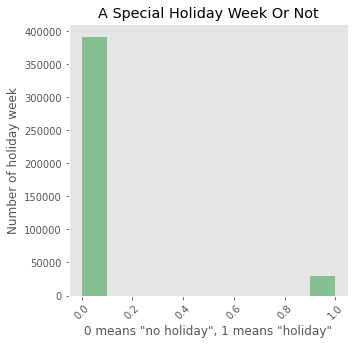

In [36]:
df.hist(column='isholiday', grid=False, xrot = 45, figsize=(5,5), color='#86bf91')
plt.title('A Special Holiday Week Or Not')
plt.xlabel('0 means "no holiday", 1 means "holiday"')
plt.ylabel('Number of holiday week')
plt.show()

In [37]:
df.groupby('store').mean()

,weekly_sales,isholiday,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,size
store,,,,,,,,,,,,
1,21710.543621,0.070578,68.224463,3.218811,8086.730317,2967.164896,1245.403495,3755.210418,5027.746924,215.995525,7.610918,151315.0
2,26898.070031,0.070522,68.105435,3.219898,10662.846653,5327.475096,1733.331807,4757.675607,6547.810734,215.651869,7.623279,202307.0
3,6373.033983,0.070053,71.298627,3.219112,3076.538863,1071.345064,929.434141,921.720083,1268.418502,219.402843,7.175602,37392.0
4,29161.210415,0.070775,62.176867,3.216237,9368.951991,4574.788136,1996.843269,5243.420816,6812.913648,128.680070,5.965849,205863.0
5,5053.415813,0.071119,69.203619,3.220912,3013.097059,1154.837704,778.070860,1149.373285,2555.504493,216.576516,6.296549,34875.0
6,21913.243624,0.070610,69.639935,3.220977,8428.614545,4064.425358,1941.351750,3723.487541,5629.100159,217.564946,6.606213,202505.0
7,8358.766148,0.070785,39.602815,3.239985,6425.755682,1718.374446,904.128033,1722.350060,3552.680003,193.671740,8.585175,70713.0
8,13133.014768,0.070339,62.447434,3.219254,7060.046707,2737.096042,1079.235331,1730.197152,5745.197655,219.438474,6.091934,155078.0
9,8772.890379,0.070486,67.646586,3.223913,3201.390280,1199.818425,1171.519319,1040.253959,3721.643483,219.683641,6.095642,125833.0


In [38]:
df['store'].value_counts()

13    10474
10    10315
4     10272
1     10244
2     10238
24    10228
27    10225
34    10224
20    10214
6     10211
32    10202
19    10148
31    10142
28    10113
41    10088
11    10062
23    10050
14    10040
40    10017
15     9901
8      9895
39     9878
17     9864
18     9859
26     9854
25     9804
7      9762
12     9705
22     9688
45     9637
21     9582
35     9528
29     9455
16     9443
3      9036
5      8999
9      8867
38     7362
37     7206
44     7169
30     7156
42     6953
43     6751
33     6487
36     6222
Name: store, dtype: int64

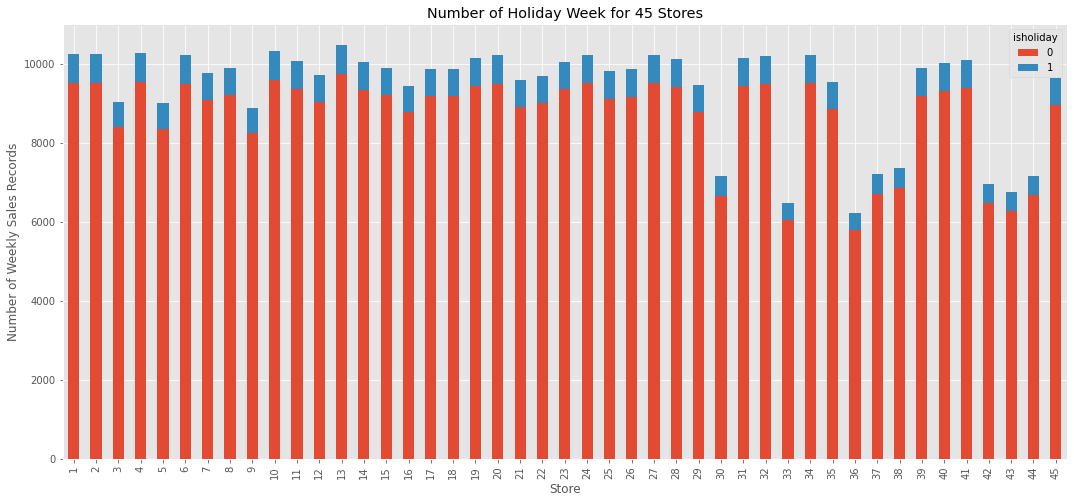

In [40]:
# Visualize the independent varible 'isholiday' by 'store'
pd.crosstab(df.store, df.isholiday).plot(kind='bar', stacked=True, figsize=(18,8))
plt.title('Number of Holiday Week for 45 Stores')
plt.xlabel('Store')
plt.ylabel('Number of Weekly Sales Records')
plt.show()

## 4. Create New Dataframe to Find Relationship of Store Sales and Holiday Mark Down 

In [41]:
df_new = df.groupby('store').sum()

In [42]:
df_new = df_new.drop(columns=['temperature', 'fuel_price', 'cpi',	'unemployment',	'size'])

In [43]:
df_new

,weekly_sales,isholiday,markdown1,markdown2,markdown3,markdown4,markdown5
store,,,,,,,
1,2.224028e+08,723,29573172.77,8946002.16,4468507.74,13732804.50,1.838647e+07
2,2.753824e+08,722,39058007.29,16088974.79,6226127.85,17427365.75,2.398463e+07
3,5.758674e+07,633,9983368.61,2659078.45,2607992.20,2870236.34,4.116018e+06
4,2.995440e+08,727,34440267.52,14186418.01,7054847.27,18897288.62,2.504427e+07
5,4.547569e+07,640,9711211.82,2701165.39,2116352.74,3555011.57,8.236391e+06
6,2.237561e+08,721,30781300.32,12819197.58,6812203.29,13598176.50,2.055747e+07
7,8.159828e+07,691,22528699.42,4387009.96,3043294.96,6038559.31,1.245570e+07
8,1.299512e+08,696,24957265.11,7973160.77,3668320.89,5996863.33,2.030927e+07
9,7.778922e+07,625,10276462.80,2490823.05,3095154.04,3208143.21,1.194648e+07


In [44]:
# Create new variable 'total_markdown' by adding all markdown
df_new['total_markdown']= df_new['markdown1'] + df_new['markdown2'] + df_new['markdown3'] + df_new['markdown4']+ df_new['markdown5']

In [46]:
# Create new variable 'markdown_to_sales_%' as a measurement of store performance, the lower the ratio, means higher profit ratio and better performance.
df_new['markdown_to_sales_%'] = round(df_new['total_markdown'] / df_new['weekly_sales'] * 100, 2)

In [47]:
# Reset index to convert 'store' from index to column
df_new.reset_index(level=0, inplace=True)
df_new.index

RangeIndex(start=0, stop=45, step=1)

In [48]:
df_new.head()

,store,weekly_sales,isholiday,markdown1,markdown2,markdown3,markdown4,markdown5,total_markdown,markdown_to_sales_%
0,1,2.224028e+08,723,29573172.77,8946002.16,4468507.74,13732804.50,18386470.50,7.510696e+07,33.77
1,2,2.753824e+08,722,39058007.29,16088974.79,6226127.85,17427365.75,23984630.72,1.027851e+08,37.32
2,3,5.758674e+07,633,9983368.61,2659078.45,2607992.20,2870236.34,4116018.04,2.223669e+07,38.61
3,4,2.995440e+08,727,34440267.52,14186418.01,7054847.27,18897288.62,25044270.57,9.962309e+07,33.26
4,5,4.547569e+07,640,9711211.82,2701165.39,2116352.74,3555011.57,8236390.98,2.632013e+07,57.88


In [49]:
df_new.describe()

,store,weekly_sales,isholiday,markdown1,markdown2,markdown3,markdown4,markdown5,total_markdown,markdown_to_sales_%
count,45.000000,4.500000e+01,45.000000,4.500000e+01,4.500000e+01,4.500000e+01,4.500000e+01,4.500000e+01,4.500000e+01,45.000000
mean,23.000000,1.497160e+08,659.133333,2.426440e+07,8.243795e+06,4.385149e+06,1.014702e+07,1.557722e+07,6.261759e+07,39.979333
std,13.133926,7.816756e+07,87.454560,1.400103e+07,5.498124e+06,2.915235e+06,6.712119e+06,1.059110e+07,3.612170e+07,17.361626
min,1.000000,3.716022e+07,437.000000,6.745642e+05,2.052786e+05,1.698880e+03,9.882510e+03,2.299423e+06,3.881565e+06,4.790000
25%,12.000000,7.956575e+07,668.000000,1.327001e+07,2.701165e+06,2.656435e+06,4.333228e+06,9.343291e+06,3.264361e+07,35.960000
50%,23.000000,1.382498e+08,696.000000,2.918231e+07,7.973161e+06,4.476007e+06,1.216794e+07,1.448042e+07,6.938021e+07,41.910000
75%,34.000000,1.996139e+08,716.000000,3.546771e+07,1.237087e+07,6.008954e+06,1.516906e+07,2.017700e+07,8.982915e+07,50.380000
max,45.000000,3.013978e+08,739.000000,4.551381e+07,1.933895e+07,1.140379e+07,2.165836e+07,6.661899e+07,1.238058e+08,68.650000


In [50]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   store                45 non-null     int64  
 1   weekly_sales         45 non-null     float64
 2   isholiday            45 non-null     int64  
 3   markdown1            45 non-null     float64
 4   markdown2            45 non-null     float64
 5   markdown3            45 non-null     float64
 6   markdown4            45 non-null     float64
 7   markdown5            45 non-null     float64
 8   total_markdown       45 non-null     float64
 9   markdown_to_sales_%  45 non-null     float64
dtypes: float64(8), int64(2)
memory usage: 3.6 KB


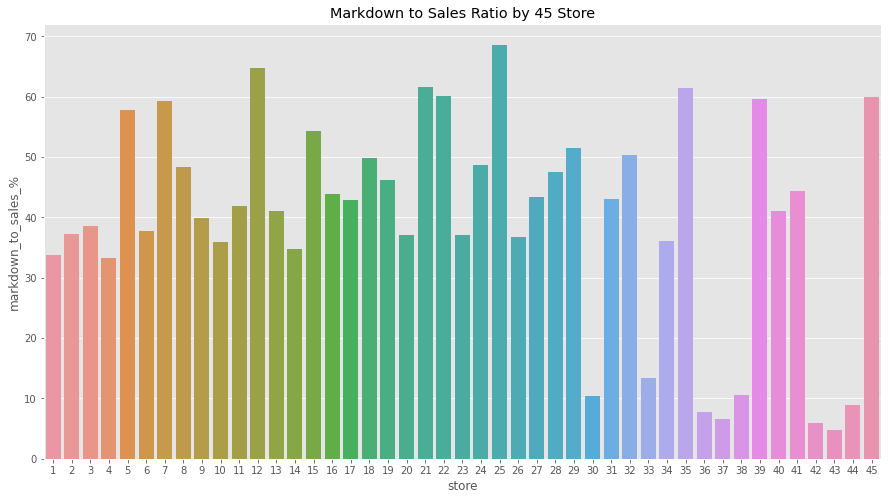

In [51]:
# markdown_to_sales_% mean is 39.979, max is 68.65, min is 4.79. 
plt.figure(figsize=(15,8))
plt.title('Markdown to Sales Ratio by 45 Store')
sns.barplot(x='store', y='markdown_to_sales_%', data=df_new)

## 5. Correlation Analysis of Number of Holiday Week and Markdown to Sales Ratio

In [52]:
# Create new dataframe for correrlation analysis
df_new_corr = df_new[['isholiday', 'markdown_to_sales_%']]

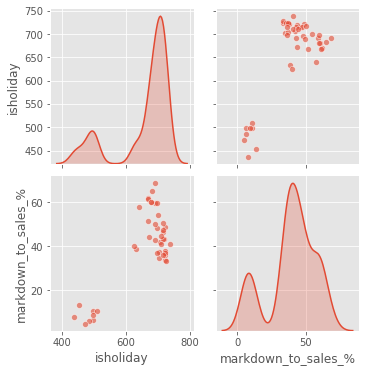

In [53]:
# Visualize 2 variables distribution
sns.pairplot(df_new_corr, diag_kind= 'kde', plot_kws = {'alpha':0.6})

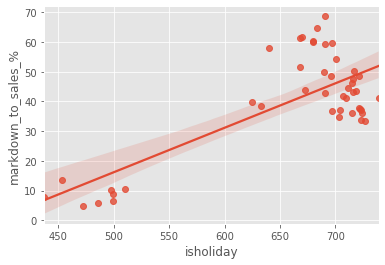

In [55]:
# Visualize regression plot of the 2 variables
sns.regplot('isholiday', 'markdown_to_sales_%', data = df_new)

## 6. Hypothesis Test and Pearson’s Correlation Analysis


In [60]:
# Create array for Number of holiday week 
arr_isholiday=df_new.iloc[:,2].values
print(arr_isholiday)

[723 722 633 727 640 721 691 696 625 724 707 683 739 703 701 673 691 690
 715 723 670 680 704 721 691 697 719 716 668 498 716 717 453 715 668 437
 499 510 697 710 711 486 472 499 680]


In [61]:
# Create array for Markdown to sales ratio 
arr_markdown_to_sales=df_new.iloc[:,-1].values
print(arr_markdown_to_sales)

[33.77 37.32 38.61 33.26 57.88 37.79 59.38 48.41 39.87 35.96 41.91 64.83
 41.01 34.84 54.3  43.96 42.85 49.88 46.21 37.1  61.7  60.2  37.12 48.67
 68.65 36.71 43.41 47.46 51.54 10.36 43.07 50.38 13.43 36.04 61.44  7.71
  6.55 10.6  59.68 41.07 44.45  6.    4.79  8.97 59.93]


In [62]:
# Pearson’s correlation coefficient is 0.75, Two-tailed p-value is much smaller than 0.05.
stats.pearsonr(arr_isholiday, arr_markdown_to_sales)

(0.7534809268657268, 2.3291321242870816e-09)